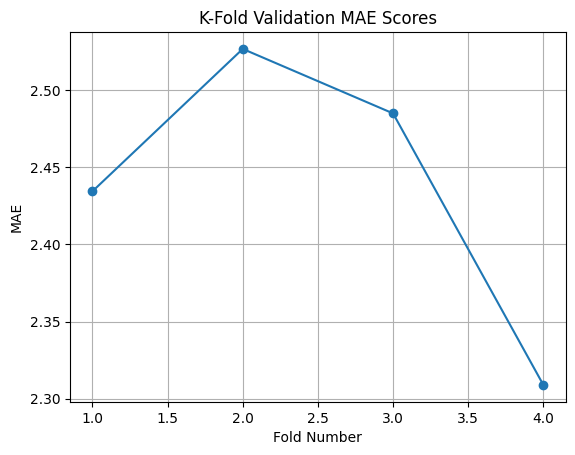

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

(x_train, y_train), _ = tf.keras.datasets.boston_housing.load_data()

mean, std = x_train.mean(axis=0), x_train.std(axis=0)
x_train = (x_train - mean) / std

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=1)
val_scores = []

for train_idx, val_idx in kf.split(x_train):
    model = build_model()
    model.fit(x_train[train_idx], y_train[train_idx], epochs=50, batch_size=1, verbose=0)
    _, mae = model.evaluate(x_train[val_idx], y_train[val_idx], verbose=0)
    val_scores.append(mae)

plt.plot(range(1, k+1), val_scores, marker='o')
plt.title("K-Fold Validation MAE Scores")
plt.xlabel("Fold Number")
plt.ylabel("MAE")
plt.grid()
plt.show()
